In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd

In [33]:
def read_xy(file_name, c1=2, c2=1):
	x = []
	y = []
	
	with open(file_name, "r") as f:
		for l in f.readlines():
			l = l.split(' ')
			x.append(float(l[c1]))
			y.append(float(l[c2]))
	return x, y

In [34]:
def remove_outliers(x, y, m=2):
	xx, yy = [], []
	for i, y_val in enumerate(y):
		if abs(y_val - np.mean(y)) < m * np.std(y):
			yy.append(y_val)
			xx.append(x[i])
	return xx, yy

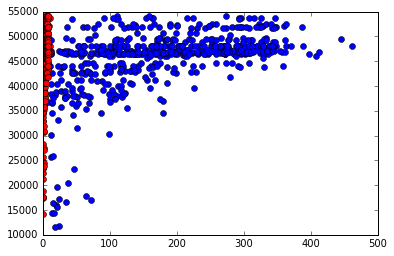

In [35]:
x,y = read_xy("./data/res_orig")

# x,y = remove_outliers(x, y, 2)

plt.plot(x, y, "bo")

x,y = read_xy("./data/res_stoch")

# x,y = remove_outliers(x, y, 2)

plt.plot(x, y, "ro")

plt.show()

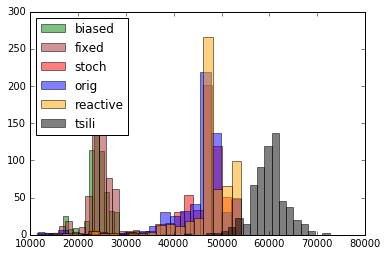

In [36]:
x,y = read_xy("./data/res_biased")

plt.hist(y, bins=20, color="green", alpha=0.5, label="biased")

x,y = read_xy("./data/res_fixed")

plt.hist(y, bins=20, color="brown", alpha=0.5, label="fixed")

x,y = read_xy("./data/res_stoch")

plt.hist(y, bins=20, color="red", alpha=0.5, label="stoch")

x,y = read_xy("./data/res_orig")

plt.hist(y, bins=20, color="blue", alpha=0.5, label="orig")

x,y = read_xy("./data/res_reactive")

plt.hist(y, bins=20, color="orange", alpha=0.5, label="reactive")

x,y = read_xy("./data/res_tsili", c1=3, c2=2)

plt.hist(y, bins=20, color="black", alpha=0.5, label="tsili")

plt.legend(loc="upper left")

plt.show()

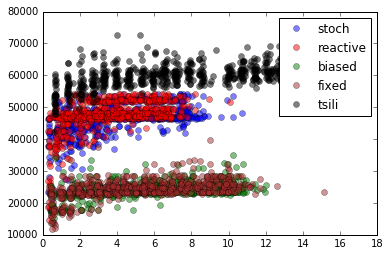

In [37]:
x,y = read_xy("./data/res_stoch")

plt.plot(x, y, "bo", alpha=0.5, label="stoch")

x,y = read_xy("./data/res_reactive")

plt.plot(x, y, "o", color="red", alpha=0.5, label="reactive")

x,y = read_xy("./data/res_biased")

plt.plot(x, y, "go", alpha=0.5, label="biased")

x,y = read_xy("./data/res_fixed")

plt.plot(x, y, "o", color="brown", alpha=0.5, label="fixed")

x,y = read_xy("./data/res_tsili", c1=3, c2=2)

plt.plot(x, y, "o", color="black", alpha=0.5, label="tsili")

plt.legend(numpoints=1)

plt.show()

In [44]:
stoch = pd.read_csv("./data/res_stoch", sep=' ', names=['iters', 'score', 'time'])[0:90]
# orig = pd.read_csv("./data/res_orig", sep=' ', names=['iters', 'score', 'time'])
fixed = pd.read_csv("./data/res_fixed", sep=' ', names=['iters', 'score', 'time'])[0:90]
biased = pd.read_csv("./data/res_biased", sep=' ', names=['iters', 'score', 'time'])[0:90]
reactive = pd.read_csv("./data/res_reactive", sep=' ', names=['iters', 'score', 'time'])[0:90]
tsili = pd.read_csv("./data/res_tsili", sep=' ', names=['iters', 'run', 'score', 'time'])[0:90]
all_dfs = [tsili, stoch, reactive, biased, fixed]
# all_dfs = [stoch, reactive, biased, fixed]
colors = ["black", "blue", "red", "green", "brown"]
# colors = ["blue", "red", "green", "brown"]
names = ["tsili", "stoch", "reactive", "biased", "fixed"]
# names = ["stoch", "reactive", "biased", "fixed"]
for df in all_dfs:#+[tsili]:
	df['perf'] = df['score'] / df['time']
	# df['perf'] = (df['perf'] - df['perf'].min()) / (df['perf'].max() - df['perf'].min())

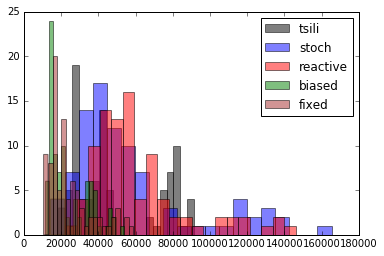

In [45]:
for i, df in enumerate(all_dfs):
	plt.hist(df['perf'], bins=20, color=colors[i], alpha=0.5, label=names[i])

plt.legend()

plt.show()

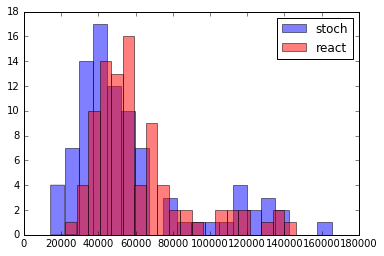

In [46]:
for i, df in enumerate([stoch, reactive]):
	plt.hist(df['perf'], bins=20, color=["blue", "red"][i], alpha=0.5, 
	         label=["stoch","react"][i])

plt.legend()

plt.show()

In [47]:
# all_dfs.append(tsili)
# colors.append("black")
# names.append("tsili")

print("Performance")
print("Name \t Mean \t \t Median \t \t Variance")
for i, df in enumerate(all_dfs):
	print("{} \t {} \t {} \t {}".format(names[i], df['perf'].mean(), 
	                                    df["perf"].median(), df["perf"].var()))
	
print
print("Score")
print("Name \t Mean \t \t Median \t \t Variance")
for i, df in enumerate(all_dfs):
	print("{} \t {} \t {} \t {}".format(names[i], df['score'].mean(),
	                                    df['score'].median(), df["score"].var()))
	
print
print("Time / Iteration")
print("Name \t Mean \t \t \t Median \t \t \t Variance")
for i, df in enumerate(all_dfs):
	print("{} \t {} \t {} \t {}".format(names[i], (df['time']/df['iters']).mean(),
	                (df['time']/df['iters']).median(), (df['time']/df['iters']).var()))

Performance
Name 	 Mean 	 	 Median 	 	 Variance
tsili 	 49098.6791153 	 41224.9820556 	 532722893.262
stoch 	 57428.9377084 	 46116.6865104 	 1115362042.37
reactive 	 61257.4606189 	 53880.7944551 	 671855909.411
biased 	 23862.6693626 	 20003.0714568 	 117054499.596
fixed 	 24256.2763262 	 20918.2328405 	 136254571.181

Score
Name 	 Mean 	 	 Median 	 	 Variance
tsili 	 55794.9730419 	 55738.8165161 	 18620299.7996
stoch 	 39042.721945 	 41811.7751777 	 86550095.6027
reactive 	 38912.8805376 	 40873.013148 	 84773455.653
biased 	 21339.9225338 	 22489.7225357 	 11144499.0814
fixed 	 20809.7706774 	 21729.9055251 	 15604022.9576

Time / Iteration
Name 	 Mean 	 	 	 Median 	 	 	 Variance
tsili 	 0.0698986046403 	 0.0679286718369 	 7.29261917319e-05
stoch 	 0.0423195109985 	 0.0405577858289 	 9.53978501368e-05
reactive 	 0.0365316200256 	 0.0357563654582 	 1.94426618185e-05
biased 	 0.0535254995911 	 0.0526529550552 	 2.3786748698e-05
fixed 	 0.0513599639027 	 0.0509618957837 	 2.569846554